## Introduction to ML - Unsupervised Learning Example  using K-means clustering & PCA

### Problem formulation

In this example, we want to create a Segmentation with customers who behave the same

We want to investigate what are the common traits / behaviours in each Segment / Cluster

We want to deploy our results in Power BI for the business to use

We want to automate all this process for future data

Importing / Installing packages

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.cluster import KMeans, k_means
%matplotlib inline

# To change sientific numbers to float
np.set_printoptions(formatter = {"float_kind":"{:f}".format})

sns.set(rc = {"figure.figsize":(8, 6)})

In [2]:
raw_data = pd.read_csv("C:/Users/USER/OneDrive/Έγγραφα/Data 360 YP/Events Raw Data.csv")

print(raw_data.shape)

raw_data.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


### Data Preprocessing

#### Exploratory Data Analysis & Data Cleaning

In [3]:
raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [4]:
raw_data[raw_data["Total_Household_Income"].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data = raw_data.dropna(subset = ["Total_Household_Income"])

print(raw_data.shape)

raw_data.isnull().sum()

(14778, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [6]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print("The number of values for feature {} :{} -- {}".format(column, nr_values,unique_vals))
    else:
        print("The number of values for feature {} :{}".format(column, nr_values))
        

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [7]:
raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

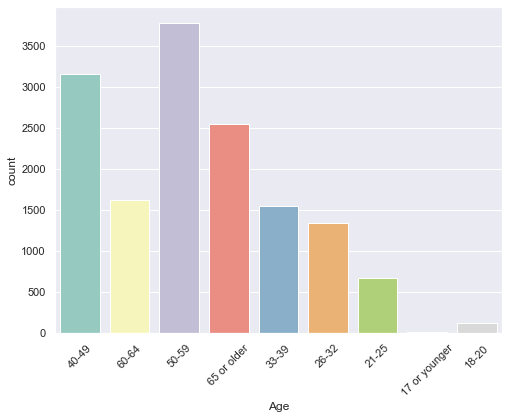

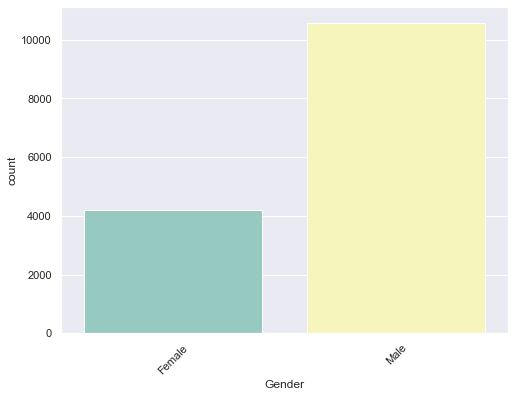

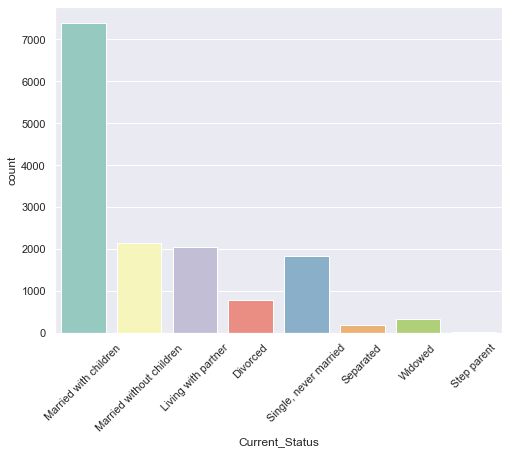

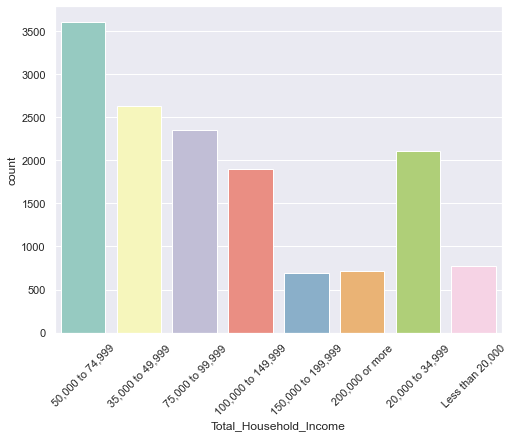

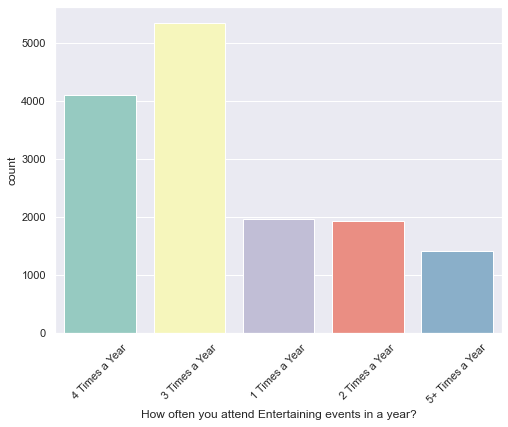

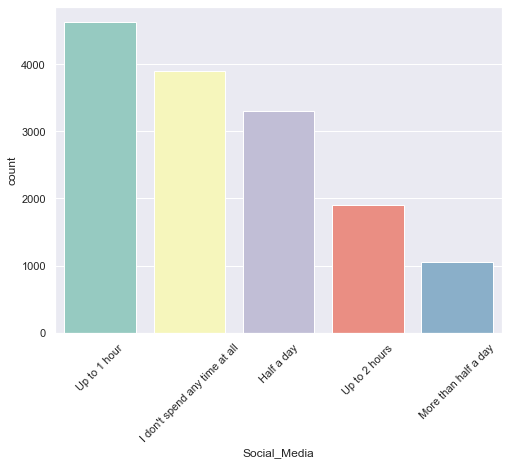

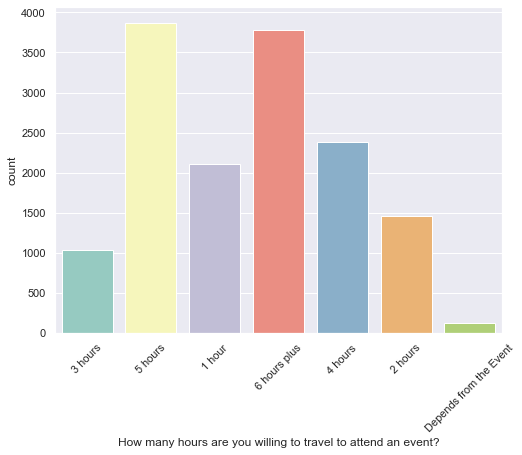

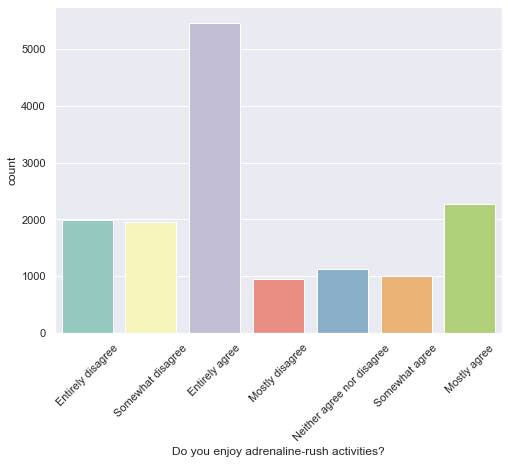

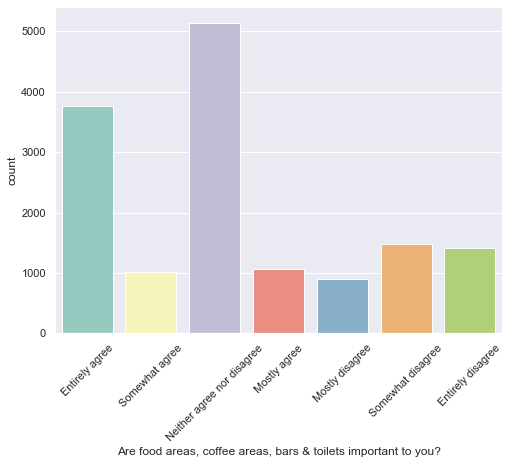

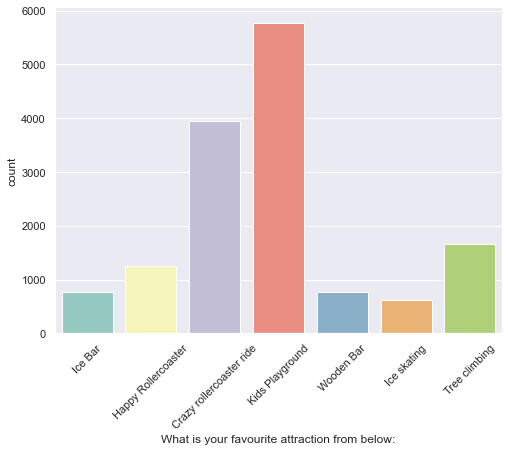

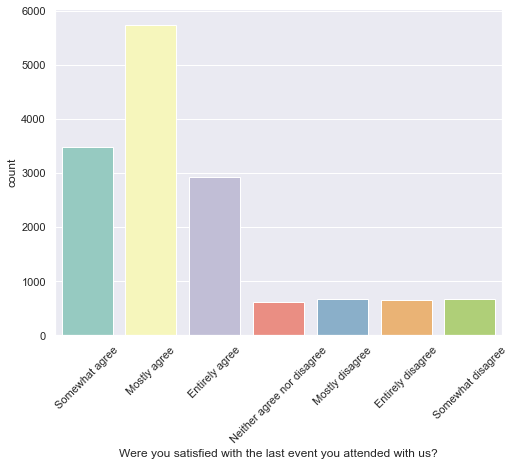

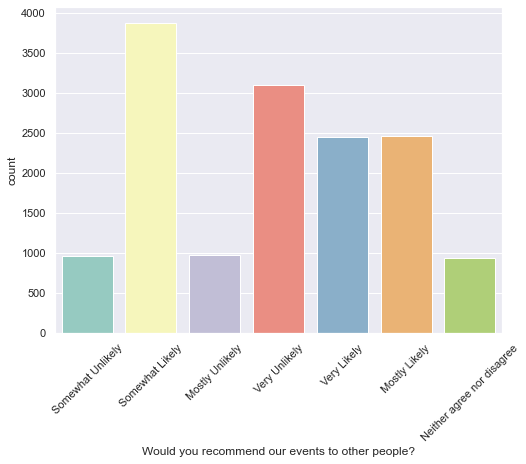

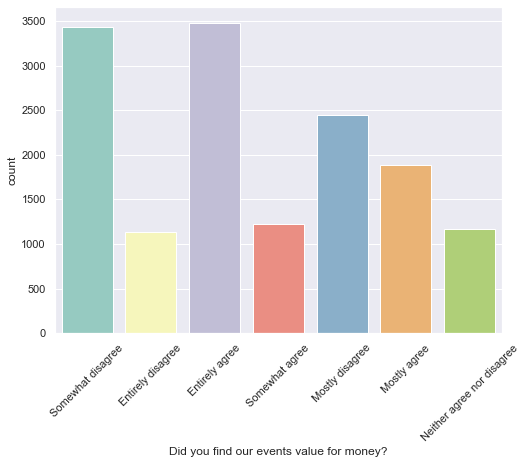

In [8]:
features = ['Age', 'Gender', 
        'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = "Set3")
    plt.xticks(rotation = 45)
    plt.show()

### Feature Engineering - Creating a distance metric

In [9]:
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [10]:
raw_data['Event Lat'] = '51.5073'
raw_data['Event Lon'] = '0.1657'


haversine_vectorize(raw_data['Event Lon'].astype(float) ,raw_data['Event Lat'].astype(float),raw_data['longitude'].astype(float) ,
                   raw_data['latitude'].astype(float))


raw_data['Distance from Event'] = haversine_vectorize(raw_data['Event Lon'].astype(float) ,raw_data['Event Lat'].astype(float),raw_data['longitude'].astype(float) ,
                   raw_data['latitude'].astype(float))

### Feature Engineering - Numeric Representation

In [11]:
print(raw_data.shape)

raw_data_1 = raw_data[features]
print(raw_data_1.shape)

new_raw_data = pd.get_dummies(raw_data_1, columns = features)

print(new_raw_data.shape)

new_raw_data.head()

(14778, 22)
(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [12]:
X_train = new_raw_data.values

kmeans = KMeans(n_clusters = 5, random_state = 540)
kmeans = kmeans.fit(X_train)

print("The clusters are: ", kmeans.labels_)

print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.29058795146


In [13]:
kmeans.labels_.shape

(14778,)

In [14]:
no_of_clusters = range(2, 20)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 125619.02972065727
The innertia for : 3 Clusters is: 114905.386842667
The innertia for : 4 Clusters is: 106337.17594801627
The innertia for : 5 Clusters is: 100865.16529237546
The innertia for : 6 Clusters is: 96432.63259151675
The innertia for : 7 Clusters is: 93814.47396613641
The innertia for : 8 Clusters is: 91696.64595956681
The innertia for : 9 Clusters is: 89725.63941314066
The innertia for : 10 Clusters is: 88493.09877798687
The innertia for : 11 Clusters is: 87575.79483059607
The innertia for : 12 Clusters is: 86617.68120513328
The innertia for : 13 Clusters is: 85829.36578008428
The innertia for : 14 Clusters is: 85014.87774331364
The innertia for : 15 Clusters is: 84404.94843926071
The innertia for : 16 Clusters is: 83702.89440746998
The innertia for : 17 Clusters is: 82945.21634250901
The innertia for : 18 Clusters is: 82483.82991929975
The innertia for : 19 Clusters is: 81967.16085789695


In [15]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

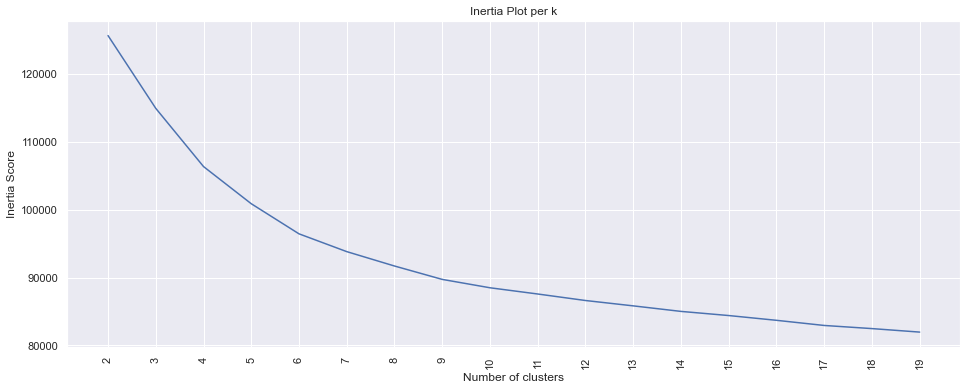

In [16]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [17]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


In [18]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 2])

In [19]:
predictions

array([2, 2, 2, ..., 2, 0, 2])

In [20]:
new_raw_data.shape

(14778, 86)

### Running Principal Component Analysis (PCA) to Visualize & Improve Results

Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 576x432 with 0 Axes>

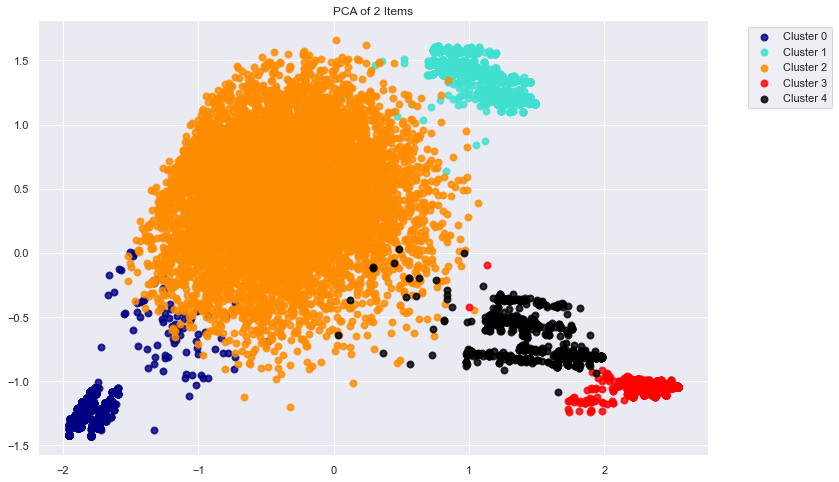

In [21]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

pca = PCA(n_components = 2, random_state = 453)
X_r = pca.fit(X).transform(X)

print("Explained variance ratio (first two components): %s" % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize = (12, 8))
colors = ["navy", "turquoise", "darkorange", "red", "black"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color = color, alpha = .8, lw = lw, label = target_name)
    
plt.legend(loc = "best", shadow = False, scatterpoints = 1)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.6)
plt.title("PCA of 2 Items")
plt.show()

### Identifying the "best" number of components

Total Variance in our dataset is:  9.78927750842857
The 95% variance we want to have is:  9.299813633007142

Variance explain with 30 n_compononets:  7.80006328761734
Variance explain with 35 n_compononets:  8.200059944222117
Variance explain with 40 n_compononets:  8.559358189926282
Variance explain with 41 n_compononets:  8.625206072416148
Variance explain with 50 n_compononets:  9.157222065601193
Variance explain with 53 n_compononets:  9.301801997586795
Variance explain with 55 n_compononets:  9.391528190593434
Variance explain with 60 n_compononets:  9.592274980903566


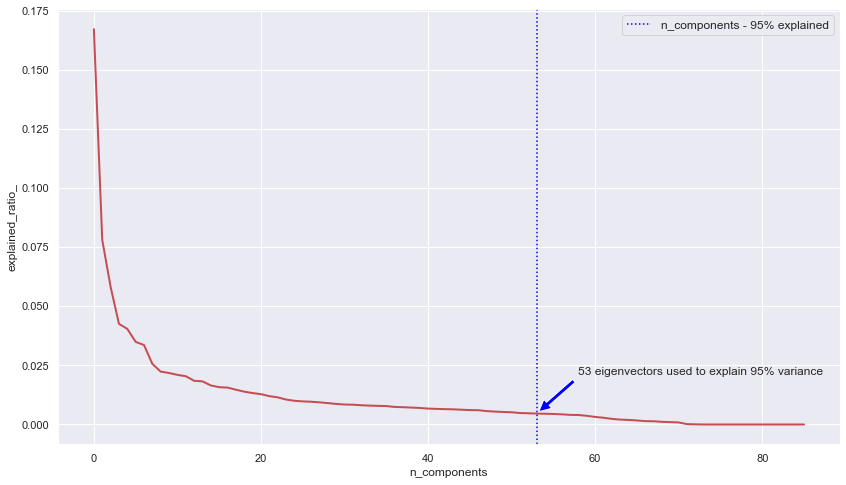

In [22]:
n_components = X.shape[1]

pca = PCA(n_components = n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns = ["PCA Comp", "Explained Variance"])

print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

plt.figure(1, figsize = (14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth = 2, c = "r")
plt.xlabel("n_components")
plt.ylabel("explained_ratio_")

plt.axvline(53, linestyle = ":", label = "n_components - 95% explained", c = "blue")
plt.legend(prop = dict(size = 12))

plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The inertia for : 2 Clusters is: 118418.00533439947
The inertia for : 3 Clusters is: 107706.73804798852
The inertia for : 4 Clusters is: 99150.89658689547
The inertia for : 5 Clusters is: 94717.71454592941
The inertia for : 6 Clusters is: 89259.988469753
The inertia for : 7 Clusters is: 87032.31815907739
The inertia for : 8 Clusters is: 84734.25265175506
The inertia for : 9 Clusters is: 82901.43389426018
The inertia for : 10 Clusters is: 81675.79302907927
The inertia for : 11 Clusters is: 80363.0711611073
The inertia for : 12 Clusters is: 79645.57849749769
The inertia for : 13 Clusters is: 78836.55417592352
The inertia for : 14 Clusters is: 77765.06416907412
The inertia for : 15 Clusters is: 77471.39025517242
The inertia for : 16 Clusters is: 76646.93730762879
The inertia for : 17 Clusters is: 75782.72402164638
The inertia for : 18 Clusters is: 75256.95483848407
The inertia for : 19 Clusters is: 74707.75842734543


Text(0.5, 1.0, 'Inertia Plot per k')

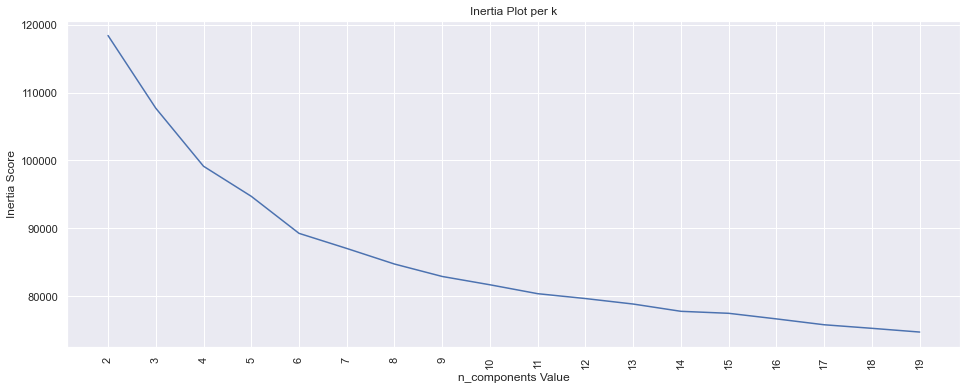

In [23]:
pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters = f, random_state = 2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)
    
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Another way of "Improving" results could be to Clean/Combine Variables

In [24]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [25]:
print("The shape is: ", new_raw_data.shape)
# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column

# 1-2 times
new_raw_data["how_often_you_attend_entertaining_events_in_a_year_1_or_2_times"] = 0
new_raw_data["how_often_you_attend_entertaining_events_in_a_year_1_or_2_times"] = new_raw_data.apply(lambda x: 1 if (x["How often you attend Entertaining events in a year?_1 Times a Year"] == 1) 
or (x["How often you attend Entertaining events in a year?_2 Times a Year"] == 1) else 0, axis=1)

# 4-5 times
new_raw_data["how_often_you_attend_entertaining_events_in_a_year_4_or_5_times"] = 0
new_raw_data["how_often_you_attend_entertaining_events_in_a_year_4_or_5_times"] = new_raw_data.apply(lambda x: 1 if (x["How often you attend Entertaining events in a year?_4 Times a Year"] == 1) 
or (x["How often you attend Entertaining events in a year?_5+ Times a Year"] == 1) else 0, axis=1)

print("The shape is: ", new_raw_data.shape)

# Cleaning the "social_media" column

# half a day + more than half a day
new_raw_data['social_media_Half a day plus'] = 0
new_raw_data['social_media_Half a day plus'] = new_raw_data.apply(lambda x: 1 if (x['Social_Media_Half a day'] == 1) or (x['Social_Media_More than half a day'] == 1) else 0, axis = 1)

print("The shape is: ", new_raw_data.shape)

# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

# 1 to 2 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = new_raw_data.apply(lambda x: 1 if (x["How many hours are you willing to travel to attend an event?_1 hour"] == 1) or (x["How many hours are you willing to travel to attend an event?_2 hours"] == 1) else 0, axis = 1)

# 3 to 4 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = new_raw_data.apply(lambda x: 1 if (x["How many hours are you willing to travel to attend an event?_3 hours"] == 1) or (x["How many hours are you willing to travel to attend an event?_4 hours"] == 1) else 0, axis = 1)

# 5 to 6 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = new_raw_data.apply(lambda x: 1 if (x["How many hours are you willing to travel to attend an event?_5 hours"] == 1) or (x["How many hours are you willing to travel to attend an event?_6 hours plus"] == 1) else 0, axis = 1)

print("The shape is: ", new_raw_data.shape)

# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

# Mostly & Somewhat Agree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = new_raw_data.apply(lambda x:  1 if (x["Do you enjoy adrenaline-rush activities?_Mostly agree"] == 1) or (x["Do you enjoy adrenaline-rush activities?_Somewhat agree"] == 1) else 0, axis = 1)

# Mostly & Somewhat Disagree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = new_raw_data.apply(lambda x: 1 if (x["Do you enjoy adrenaline-rush activities?_Mostly disagree"] == 1) or (x["Do you enjoy adrenaline-rush activities?_Somewhat disagree"] == 1) else 0, axis = 1)

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 86)
The shape is:  (14778, 88)
The shape is:  (14778, 89)
The shape is:  (14778, 92)
The shape is:  (14778, 94)


In [26]:
# Cleaning the "are_food_areas_coffee_areas_bars_toilets_important_to_you" column

# Mostly & Somewhat Agree
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = new_raw_data.apply(lambda x: 1 if (x["Are food areas, coffee areas, bars & toilets important to you?_Mostly agree"] == 1) or (x["Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree"] == 1) else 0, axis = 1)

# Mostly & Somewhat & entirely Disagree
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = new_raw_data.apply(lambda x: 1 if (x["Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree"] == 1) or (x["Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree"]) or (x["Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree"] == 1) else 0, axis = 1)

print("The shape is: ", new_raw_data.shape)

# Cleaning the "were_you_satisfied_with_the_last_event_you_attended_with_us" column

# Entirely & Mostly & Somewhat & Neither Disagree
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = new_raw_data.apply(lambda x: 1 if (x["Were you satisfied with the last event you attended with us?_Entirely disagree"] == 1) or (x["Were you satisfied with the last event you attended with us?_Mostly disagree"] == 1) or (x["Were you satisfied with the last event you attended with us?_Somewhat disagree"] == 1) or (x["Were you satisfied with the last event you attended with us?_Neither agree nor disagree"] == 1) else 0, axis = 1)

print("The shape is: ", new_raw_data.shape)

# Cleaning the "would_you_recommend_our_events_to_other_people" column

# Mostly & Somewhat & Neither Unlikely
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = new_raw_data.apply(lambda x: 1 if (x["Would you recommend our events to other people?_Mostly Unlikely"] == 1) or (x["Would you recommend our events to other people?_Somewhat Unlikely"] == 1) or (x["Would you recommend our events to other people?_Neither agree nor disagree"] == 1) else 0, axis = 1)

print("The shape is: ", new_raw_data.shape)


# Cleaning the "did_you_find_our_events_value_for_money" column

# Mostly & Somewhat agree
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = new_raw_data.apply(lambda x: 1 if (x["Did you find our events value for money?_Mostly agree"] == 1) or (x["Did you find our events value for money?_Somewhat agree"] == 1) else 0, axis = 1)

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 96)
The shape is:  (14778, 97)
The shape is:  (14778, 98)
The shape is:  (14778, 99)


In [27]:
# Replacing apostrophe from columns names
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

# Excluding the fields we have merged together
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
#'How often you attend Entertaining events in a year?_1 Times a Year',
#'How often you attend Entertaining events in a year?_2 Times a Year',
       'How often you attend Entertaining events in a year?_3 Times a Year',
#'How often you attend Entertaining events in a year?_4 Times a Year',
#'How often you attend Entertaining events in a year?_5+ Times a Year',
#'Social_Media_Half a day', 
       'Social_Media_I dont spend any time at all',
#'Social_Media_More than half a day', 
       'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
#'How many hours are you willing to travel to attend an event?_1 hour',
#'How many hours are you willing to travel to attend an event?_2 hours',
#'How many hours are you willing to travel to attend an event?_3 hours',
#'How many hours are you willing to travel to attend an event?_4 hours',
#'How many hours are you willing to travel to attend an event?_5 hours',
#'How many hours are you willing to travel to attend an event?_6 hours plus',
       'How many hours are you willing to travel to attend an event?_Depends from the Event',
       'Do you enjoy adrenaline-rush activities?_Entirely agree',
       'Do you enjoy adrenaline-rush activities?_Entirely disagree',
#'Do you enjoy adrenaline-rush activities?_Mostly agree',
#'Do you enjoy adrenaline-rush activities?_Mostly disagree',
       'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
#'Do you enjoy adrenaline-rush activities?_Somewhat agree',
#'Do you enjoy adrenaline-rush activities?_Somewhat disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely agree',
#'Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree',
#'Are food areas, coffee areas, bars & toilets important to you?_Mostly agree',
#'Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
#'Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree',
#'Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree',
       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',
       'Were you satisfied with the last event you attended with us?_Entirely agree',
#'Were you satisfied with the last event you attended with us?_Entirely disagree',
       'Were you satisfied with the last event you attended with us?_Mostly agree',
#'Were you satisfied with the last event you attended with us?_Mostly disagree',
#'Were you satisfied with the last event you attended with us?_Neither agree nor disagree',
       'Were you satisfied with the last event you attended with us?_Somewhat agree',
#'Were you satisfied with the last event you attended with us?_Somewhat disagree',
       'Would you recommend our events to other people?_Mostly Likely',
#'Would you recommend our events to other people?_Mostly Unlikely',
#'Would you recommend our events to other people?_Neither agree nor disagree',
       'Would you recommend our events to other people?_Somewhat Likely',
#'Would you recommend our events to other people?_Somewhat Unlikely',
       'Would you recommend our events to other people?_Very Likely',
       'Would you recommend our events to other people?_Very Unlikely',
       'Did you find our events value for money?_Entirely agree',
       'Did you find our events value for money?_Entirely disagree',
#'Did you find our events value for money?_Mostly agree',
       'Did you find our events value for money?_Mostly disagree',
       'Did you find our events value for money?_Neither agree nor disagree',
#'Did you find our events value for money?_Somewhat agree',
       'Did you find our events value for money?_Somewhat disagree',
        
        "how_often_you_attend_entertaining_events_in_a_year_1_or_2_times",
        "how_often_you_attend_entertaining_events_in_a_year_4_or_5_times",
               
        'social_media_Half a day plus',
               
        'how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
        'how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
        'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
               
        'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
        'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
               
        'are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
        'are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
               
        'were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
               
        'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
               
        'did_you_find_our_events_value_for_money Mostly & Somewhat agree']

The innertia for : 2 Clusters is: 116884.12816352135
The innertia for : 3 Clusters is: 103587.27451723086
The innertia for : 4 Clusters is: 96342.07475327986
The innertia for : 5 Clusters is: 91346.36112956707
The innertia for : 6 Clusters is: 88976.31697308291
The innertia for : 7 Clusters is: 86892.48499145362
The innertia for : 8 Clusters is: 85000.60726194101
The innertia for : 9 Clusters is: 83346.81110242213
The innertia for : 10 Clusters is: 82116.63566141778
The innertia for : 11 Clusters is: 81128.48627667848
The innertia for : 12 Clusters is: 80030.01354974751
The innertia for : 13 Clusters is: 78928.33244130152
The innertia for : 14 Clusters is: 78022.96100161284
The innertia for : 15 Clusters is: 77409.1467871143
The innertia for : 16 Clusters is: 76832.48857370146
The innertia for : 17 Clusters is: 76155.10042039499
The innertia for : 18 Clusters is: 75571.32003601926
The innertia for : 19 Clusters is: 74854.03250717536
The innertia for : 20 Clusters is: 74279.23483647422


Text(0.5, 1.0, 'Inertia Plot per k')

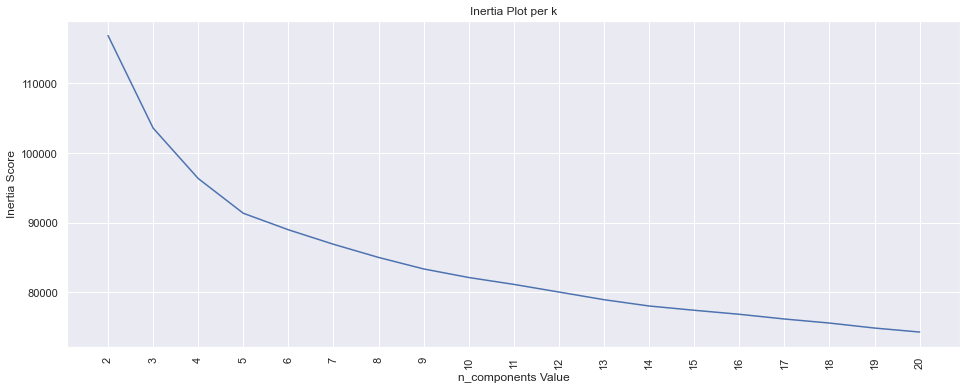

In [28]:
# Re - Running Kmeans on "new" data

X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)
    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Running PCA on New Dataset after grouping

Explained variance ratio (first two components): [0.192767 0.096030]


<Figure size 576x432 with 0 Axes>

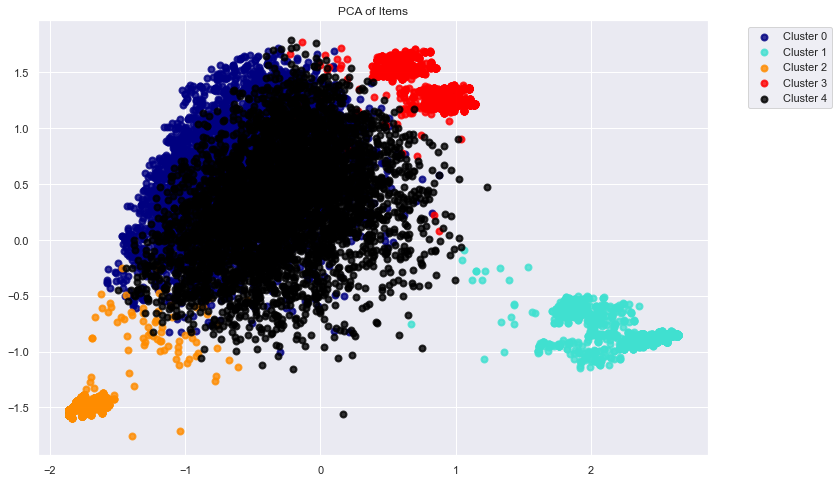

In [29]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  9.322886930766542
The 95% variance we want to have is:  8.856742584228215

Variance explain with 30 n_compononets:  8.174073111210651
Variance explain with 35 n_compononets:  8.558137719474265
Variance explain with 36 n_compononets:  8.6232779790702
Variance explain with 40 n_compononets:  8.86339682285
Variance explain with 41 n_compononets:  8.91438719262266
Variance explain with 50 n_compononets:  9.26857425202093


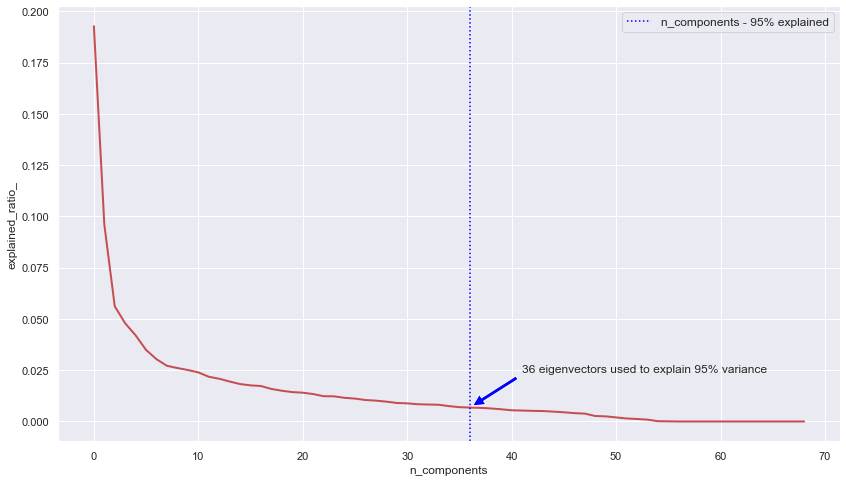

In [30]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(36,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('36 eigenvectors used to explain 95% variance', xy=(36, pca.explained_variance_ratio_[36]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 105582.24894248701
The innertia for : 3 Clusters is: 93254.94559906116
The innertia for : 4 Clusters is: 86034.61810989476
The innertia for : 5 Clusters is: 81054.24433482224
The innertia for : 6 Clusters is: 78704.95704314044
The innertia for : 7 Clusters is: 76622.051158861
The innertia for : 8 Clusters is: 74734.76708175683
The innertia for : 9 Clusters is: 73724.35325959844
The innertia for : 10 Clusters is: 71905.86497879415
The innertia for : 11 Clusters is: 70795.78577967541
The innertia for : 12 Clusters is: 69653.68523197308
The innertia for : 13 Clusters is: 68738.02875535397
The innertia for : 14 Clusters is: 68198.46416112281
The innertia for : 15 Clusters is: 67436.66583219124
The innertia for : 16 Clusters is: 66454.73943739275
The innertia for : 17 Clusters is: 65927.00611881305
The innertia for : 18 Clusters is: 65090.03324495781
The innertia for : 19 Clusters is: 64686.575813292875
The innertia for : 20 Clusters is: 63930.95052357114


Text(0.5, 1.0, 'Inertia Plot per k')

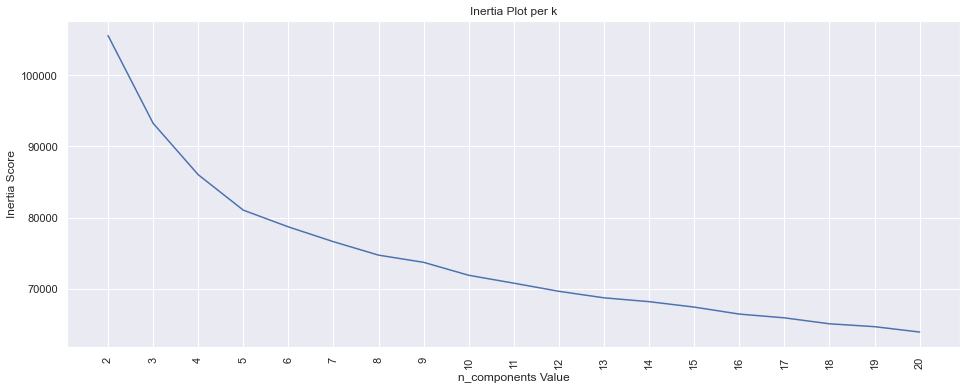

In [31]:
# Running PCA again

pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Running Kmeans with 5 clusters and using a PCA dataset with 36 components

In [32]:
# Running PCA with 36 PC
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
raw_data['Clusters'] = clusters

# Creating a cluster Category
raw_data['Clusters Category'] = 'No Data'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 0] = 'Cluster 1'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 1] = 'Cluster 2'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 2] = 'Cluster 3'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 3] = 'Cluster 4'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 4] = 'Cluster 5'

raw_data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13972\2387142734.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Clusters Category'].loc[raw_data['Clusters'] == 0] = 'Cluster 1'
C:\Users\USER\AppData\Local\Temp\ipykernel_13972\2387142734.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Clusters Category'].loc[raw_data['Clusters'] == 1] = 'Cluster 2'
C:\Users\USER\AppData\Local\Temp\ipykernel_13972\2387142734.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Event Lat,Event Lon,Distance from Event,Clusters,Clusters Category
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502,3,Cluster 4
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761,0,Cluster 1
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783,0,Cluster 1
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287,1,Cluster 2
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110,2,Cluster 3


In [33]:
raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Event Lat', 'Event Lon',
       'Distance from Event', 'Clusters', 'Clusters Category'],
      dtype='object')

In [34]:
# Creating an order for Household Income

raw_data['Household Income Order'] = 0
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == 'Less than 20,000'] = 1
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '20,000 to 34,999'] = 2
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '35,000 to 49,999'] = 3
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '50,000 to 74,999'] = 4
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '75,000 to 99,999'] = 5
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '100,000 to 149,999'] = 6
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '150,000 to 199,999'] = 7
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
raw_data['Social_Media'] = raw_data['Social_Media'].str.replace("'","")

# Creating an order for Social Media Time Spend
raw_data['Social Media Time Spend Order'] = 0
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'I dont spend any time at all'] = 1
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'Up to 1 hour'] = 2
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'Up to 2 hours'] = 3
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'Half a day'] = 4
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely agree'] = 1
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly agree'] = 2
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat agree'] = 3
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Neither agree nor disagree'] = 4
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat disagree'] = 5
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly disagree'] = 6
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely disagree'] = 7

# Creating an order for do_you_enjoy_adrenaline_rush_activities
raw_data['enjoy_adrenaline_rush_activities Agree Order'] = 0
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Entirely agree'] = 1
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Mostly agree'] = 2
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat agree'] = 3
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Neither agree nor disagree'] = 4
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat disagree'] = 5
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Mostly disagree'] = 6
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Entirely disagree'] = 7

# Creating an order for were_you_satisfied_with_the_last_event_you_attended_with_us
raw_data['Satisfied Agree Order'] = 0
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Entirely agree'] = 1
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Mostly agree'] = 2
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Somewhat agree'] = 3
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Neither agree nor disagree'] = 4
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Somewhat disagree'] = 5
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Mostly disagree'] = 6
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Entirely disagree'] = 7

# Creating an order for did_you_find_our_events_value_for_money
raw_data['Value_for_money Agree Order'] = 0
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Entirely agree'] = 1
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Mostly agree'] = 2
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Somewhat agree'] = 3
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Neither agree nor disagree'] = 4
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Somewhat disagree'] = 5
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Mostly disagree'] = 6
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Entirely disagree'] = 7


# Creating an order for would_you_recommend_our_events_to_other_people
raw_data['Recommend Order'] = 0
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Very Likely'] = 1
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Mostly Likely'] = 2
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Somewhat Likely'] = 3
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Neither agree nor disagree'] = 4
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Somewhat Unlikely'] = 5
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Mostly Unlikely'] = 6
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Very Unlikely'] = 7

C:\Users\USER\AppData\Local\Temp\ipykernel_13972\3543815915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == 'Less than 20,000'] = 1
C:\Users\USER\AppData\Local\Temp\ipykernel_13972\3543815915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '20,000 to 34,999'] = 2
C:\Users\USER\AppData\Local\Temp\ipykernel_13972\3543815915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [35]:
!pip install pyodbc

In [36]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib

quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=ASROCKG31M-SASG;"
                     "Database=Data360YP;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

raw_data.to_sql('Events_Cluster_Output', schema='dbo', con = engine, if_exists = 'replace')

-1

In [37]:
# Exporting the data in a CSV

raw_data.to_csv('Events_Cluster_Output.csv', sep='\t')

In [38]:
raw_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,34.342502,3,Cluster 4,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,41.376761,0,Cluster 1,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,701.484783,0,Cluster 1,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,176.943287,1,Cluster 2,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,17.216110,2,Cluster 3,6,2,4,6,1,1,7


In [39]:
os.getcwd()

'C:\\Users\\USER\\Unsupervised-Learning-K-Means'